In [ ]:
import pandas as pd

data = pd.read_csv('/content/webex_consolidated.csv')
data

,Feature Description,Month
0,Hosts or cohosts are easily able to identify a...,1
1,"As a host, you can customize the templates you...",1
2,This feature includes the following administra...,1
3,As part of our drive to provide you with secur...,1
4,Webex remembers your closed captioning selecti...,1
...,...,...
163,Mobile users can now either show or hide their...,12
164,The Webex Meetings app for iPhone and iPad is ...,12
165,"Webinar hosts, cohosts, and panelists can now ...",12
166,IT administrators can restrict their company d...,12


In [ ]:
def label_df(df, month:int):
  data = df
  data['Label'] = (data['Month'] >= month).astype(int)
  return data



```
# This is formatted as code
```

# Add labels to dataframe

In [ ]:
# Using cutoff month to be June (7)
# So months < 7 are 'old' -> class 0
# And months >= 7 are 'new' -> class 1

# this line creates a new column called 'Label'
# the value for each row is determined by comparing that row's 'Month' value with 7 (as the cut-off)
#print(data.columns.tolist())
data['Label'] = (data['Month'] >= 7).astype(int)
data

,Feature Description,Month,Label
0,Hosts or cohosts are easily able to identify a...,1,0
1,"As a host, you can customize the templates you...",1,0
2,This feature includes the following administra...,1,0
3,As part of our drive to provide you with secur...,1,0
4,Webex remembers your closed captioning selecti...,1,0
...,...,...,...
163,Mobile users can now either show or hide their...,12,1
164,The Webex Meetings app for iPhone and iPad is ...,12,1
165,"Webinar hosts, cohosts, and panelists can now ...",12,1
166,IT administrators can restrict their company d...,12,1


In [ ]:
old_rows = data[data['Label']==0]
old_rows

,Feature Description,Month,Label
0,Hosts or cohosts are easily able to identify a...,1,0
1,"As a host, you can customize the templates you...",1,0
2,This feature includes the following administra...,1,0
3,As part of our drive to provide you with secur...,1,0
4,Webex remembers your closed captioning selecti...,1,0
...,...,...,...
80,To ensure you have a good support experience w...,6,0
81,You can now scale the Share content window to ...,6,0
82,Mobile users can now view their network qualit...,6,0
83,IT administrators can now enable the embedded ...,6,0


In [ ]:
new_rows = data[data['Label']==1]
new_rows

,Feature Description,Month,Label
85,Webex Meetings users can view their upcoming m...,7,1
86,"With Windows 11, Webex Meetings now allows you...",7,1
87,Users on on-premises registered video devices ...,7,1
88,The host can upload a music file in the schedu...,7,1
89,"In the desktop app for Meetings and Webinars, ...",7,1
...,...,...,...
163,Mobile users can now either show or hide their...,12,1
164,The Webex Meetings app for iPhone and iPad is ...,12,1
165,"Webinar hosts, cohosts, and panelists can now ...",12,1
166,IT administrators can restrict their company d...,12,1


<AxesSubplot:>

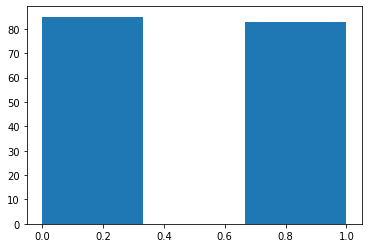

In [ ]:
# histogram of count of 0s and count of 1s
data['Label'].hist(grid=False, bins=3)

# Use Bag-of_Words to vectorize the text data


In [ ]:
# using scikit-learn's CountVectorizer for Bag-of-Words embedding
from sklearn.feature_extraction.text import CountVectorizer

# initialize the vectorizer object
vectorizer = CountVectorizer()

# fit our bag-of-words vector from the 'Feature Description' column in the dataframe
bag = vectorizer.fit_transform(data['Feature Description'])

# Explore the data

In [ ]:
# Get unique words/tokens found in all the feature descriptions
print('Array of unique words: ')
print(vectorizer.get_feature_names_out())

# Print the numerical text vector after Bag-of-Words embedding
print('\nBag-of-Words embedded text vector: ')
print(bag.toarray())

# Associate the indices in the text vector with each unique word
print('\nIndices for each unique word in embedded text vector: ')
print(vectorizer.vocabulary_)

Array of unique words: 
['000' '10' '100' ... 'yourselves' 'yous' 'zoom']

Bag-of-Words embedded text vector: 
[[0 0 0 ... 0 0 0]
 [2 1 0 ... 0 1 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Indices for each unique word in embedded text vector: 
{'hosts': 616, 'or': 909, 'cohosts': 279, 'are': 127, 'easily': 433, 'able': 20, 'to': 1358, 'identify': 627, 'participant': 938, 'joining': 710, 'meeting': 817, 'as': 133, 'internal': 679, 'their': 1335, 'organization': 912, 'external': 498, 'unverified': 1411, 'where': 1483, 'the': 1334, 'user': 1428, 'isn': 698, 'authenticated': 152, 'by': 210, 'webex': 1470, 'and': 89, 'therefore': 1341, 'can': 218, 'be': 170, 'verified': 1442, 'notification': 870, 'of': 884, 'waiting': 1459, 'in': 642, 'lobby': 763, 'is': 697, 'now': 875, 'more': 834, 'prominent': 1033, 'hidden': 602, 'list': 759, 'remove': 1113, 'from': 547, 'they': 1343, 'also': 80, 'select': 1187, 'an': 87, 'entire': 471, 'group': 579, 'admit': 5

In [ ]:
# X has shape (168, 1516)
# because we have 281 examples of features (i.e. 168 rows in the CSV file) 
# and we have 1456 unique words in our vocabulary (i.e. 1456 unique words in the CSV's feature descriptions)
X = bag.toarray()
X.shape

(168, 1516)

In [ ]:
# y has shape (168)
# because there is a class label (0/1) for each of our 168 feature descriptions
y = data['Label']
y.shape

(168,)

# Train Test Split


In [ ]:
#Test Train Split
from sklearn.model_selection import train_test_split
"""
  Splits Data into two separate sets (training set, testing set)

  Utilizes Sklearn's test train split function to split arrays
  We are going preliminarily with a 30& split (0,30) test size 
  Input: X & y array (features & labels)  
  Returns:
    4 arrays with training data and test data (x & y)
"""
# X and Y already Built
X_train, X_test, y_train, y_test = train_test_split(X,y,
    test_size=0.28, train_size=0.72, random_state=42)
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)
print(y_test)
# Training and testing sizes already here

(120, 1516) (48, 1516) (120,) (48,)
137    1
30     0
119    1
29     0
142    1
161    1
164    1
51     0
105    1
60     0
15     0
156    1
133    1
45     0
68     0
85     1
24     0
109    1
75     0
108    1
19     0
16     0
31     0
18     0
12     0
9      0
82     0
98     1
76     0
55     0
42     0
56     0
148    1
111    1
69     0
136    1
2      0
93     1
134    1
152    1
90     1
114    1
26     0
144    1
135    1
97     1
65     0
36     0
Name: Label, dtype: int64


#Training the knn model

In [ ]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)
  
knn.fit(X_train, y_train)
  
# Predict on dataset which model has not seen before
testResults = knn.predict(X_test)
print(len(testResults))
print(testResults)

48
[0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1
 0 0 0 0 0 1 0 0 0 0 0]


# Checking for accuracy by iterating over different k values


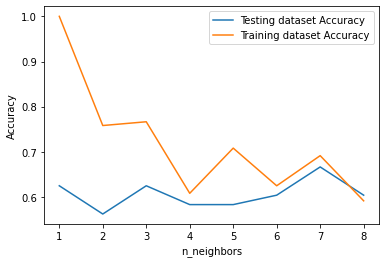

In [ ]:
#We will now iterate over different values of k to check for best accuracy

# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt


neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#The above plot shows that a k value of 3, followed by 5 works best 
# for the model without overfitting 

In [ ]:
# Predicting results using Test data set
pred = knn.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.6041666666666666

In [ ]:
#A 72-28 test train split gives us a measure of highest acccuracy with a 
# k neighbor value of 4 which seems like a reasonable inference.
